In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

reviews_df = pd.read_csv('data/reviews.csv', parse_dates = True)
reviews_df.head()

,title,developers,publishers,release_date,platforms,genres,score,reviewed_by
0,Mass Effect Legendary Edition Part 3: Mass Ef...,BioWare,Electronic Arts,2021-05-14,"Xbox One, PlayStation 4, PC","Compilation, RPG",8,Dan Stapleton
1,Call of Duty: Vanguard - Single-Player Campaign,"Treyarch, Sledgehammer Games",Activision,2021-11-05,"Xbox Series X|S, Xbox One, PlayStation 5, P...","Shooter, First-Person",7,Simon Cardy
2,Shin Megami Tensei V,Atlus,Atlus,2021-11-12,Nintendo Switch,RPG,8,Leana Hafer
3,Forza Horizon 5,Playground Games,Xbox Game Studios,2021-11-09,"PC, Xbox Series X|S, Xbox One",Racing,10,Luke Reilly
4,Riders Republic,Ubisoft Annecy,Ubisoft,2021-10-28,"Stadia, PlayStation 5, PlayStation 4, Xbox ...","Sports, Extreme Sports",8,Travis Northup


In [2]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         236 non-null    object
 1   developers    205 non-null    object
 2   publishers    232 non-null    object
 3   release_date  221 non-null    object
 4   platforms     234 non-null    object
 5   genres        235 non-null    object
 6   score         236 non-null    int64 
 7   reviewed_by   236 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.9+ KB


In [3]:
reviews_df['release_date'] = reviews_df['release_date'].replace('TBA 2021', np.nan)
reviews_df['release_date'] = reviews_df['release_date'].replace('Q4 2021', np.nan)
reviews_df['release_date'] = reviews_df['release_date'].replace('Q3 2021', np.nan)
reviews_df['release_date'] = reviews_df['release_date'].replace('TBA', np.nan)
reviews_df['release_date'] = reviews_df['release_date'].replace('TBA 2023', np.nan)
reviews_df['release_date'] = pd.to_datetime(reviews_df['release_date'])
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         236 non-null    object        
 1   developers    205 non-null    object        
 2   publishers    232 non-null    object        
 3   release_date  221 non-null    datetime64[ns]
 4   platforms     234 non-null    object        
 5   genres        235 non-null    object        
 6   score         236 non-null    int64         
 7   reviewed_by   236 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 14.9+ KB


In [4]:
(reviews_df.isnull().sum()/reviews_df.shape[0])*100

title            0.000000
developers      13.135593
publishers       1.694915
release_date     6.355932
platforms        0.847458
genres           0.423729
score            0.000000
reviewed_by      0.000000
dtype: float64

In [5]:
from collections import Counter
from itertools import chain


reviews_df['platforms'] = reviews_df['platforms'].fillna('NaN')
value_count_platforms = pd.Series(Counter(chain.from_iterable((reviews_df['platforms'].str.split(',  '))))).to_frame()
value_count_platforms = value_count_platforms.rename(columns = {0: 'platforms'})

In [6]:
value_count_platforms_sorted = value_count_platforms.sort_values(by = ['platforms'], ascending = False)
value_count_platforms_sorted.head() 

,platforms
PC,173
PlayStation 4,134
Xbox One,118
PlayStation 5,103
Nintendo Switch,93


<AxesSubplot:xlabel='platforms'>

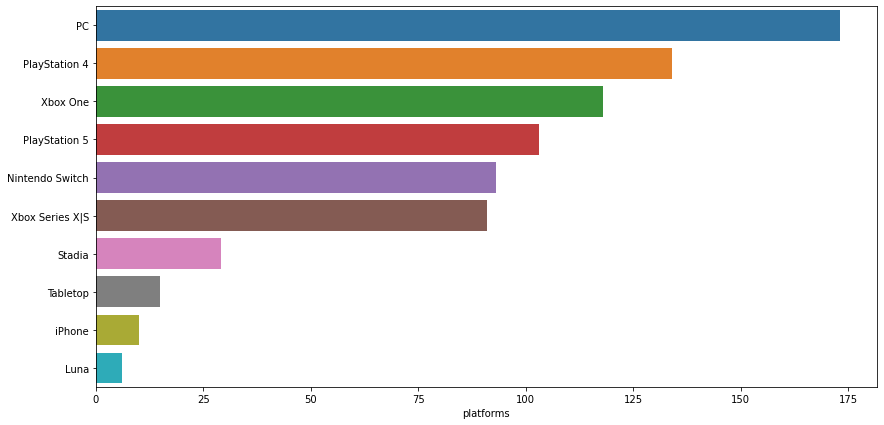

In [7]:
plt.figure(figsize=(14, 7))
sns.barplot(x = value_count_platforms_sorted.platforms[:10], y = value_count_platforms_sorted.index[:10])

In [8]:
from collections import Counter
from itertools import chain


reviews_df['genres'] = reviews_df['genres'].fillna('NaN')
value_count_genres = pd.Series(Counter(chain.from_iterable((reviews_df['genres'].str.split(',  '))))).to_frame()
value_count_genres = value_count_genres.rename(columns = {0: 'genres'})

In [9]:
value_count_genres_sorted = value_count_genres.sort_values(by = ['genres'], ascending = False)
value_count_genres_sorted

,genres
Action,78
RPG,57
Adventure,51
Shooter,23
Platformer,18
Strategy,18
Sports,13
Board,13
Racing,12
Hardware,10


<AxesSubplot:xlabel='genres'>

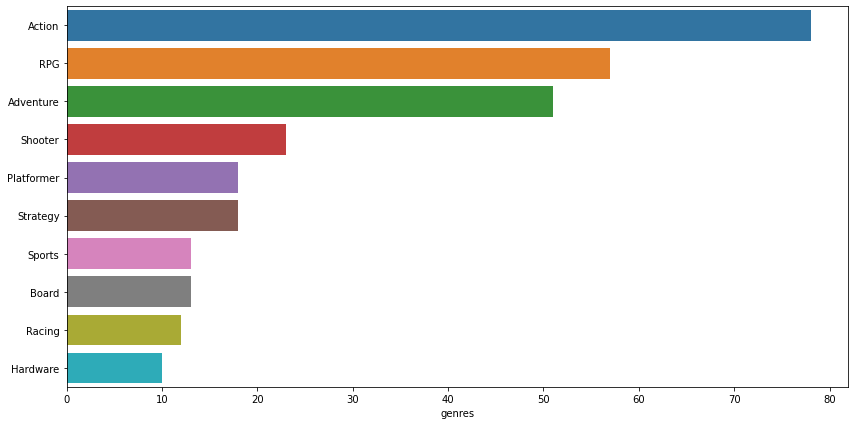

In [10]:
plt.figure(figsize=(14, 7))
sns.barplot(x = value_count_genres_sorted.genres[:10], y = value_count_genres_sorted.index[:10])

In [11]:
reviews_df['genres'].value_counts()

Action                                          21
RPG                                             18
Adventure                                       14
Action,  Adventure                              12
Racing                                          11
                                                ..
Action,  Platformer,  Roguelike / Rogue-Lite     1
Action,  Crime,  Adventure                       1
Shooter,  First-Person,  Open-World              1
Action,  RPG,  Strategy                          1
RPG,  Persistent Online                          1
Name: genres, Length: 98, dtype: int64

In [23]:
reviews_df['publishers'].value_counts().to_frame()

,publishers
Electronic Arts,13
Square Enix,10
Nintendo,10
Ubisoft,7
Sony Interactive Entertainment,6
Bandai Namco Games,6
Annapurna Interactive,6
SEGA,5
Capcom,4
Focus Home Interactive,4


In [13]:
reviews_df['score'].value_counts().to_frame()

,score
8,75
7,65
9,37
6,29
5,18
4,8
10,3
2,1


In [14]:
reviews_df[reviews_df['score'] == 10]

,title,developers,publishers,release_date,platforms,genres,score,reviewed_by
3,Forza Horizon 5,Playground Games,Xbox Game Studios,2021-11-09,"PC, Xbox Series X|S, Xbox One",Racing,10,Luke Reilly
53,Deathloop,Arkane Studios,Bethesda Softworks,2021-09-14,"PC, PlayStation 5",Action,10,Matt Purslow
153,Disco Elysium - The Final Cut,ZA/UM,ZA/UM,2021-03-30,"PlayStation 5, PlayStation 4, iPhone, Stadi...",RPG,10,Simon Cardy


C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score'>

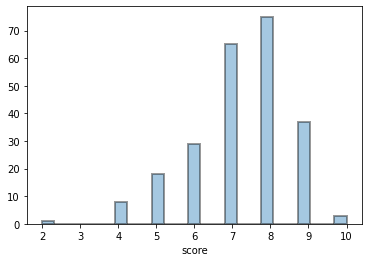

In [15]:
sns.distplot(reviews_df['score'], kde = False, hist_kws = dict(edgecolor = "k", linewidth = 2))

In [16]:
reviews_df['reviewed_by'].value_counts().to_frame().head() 

,reviewed_by
Tristan Ogilvie,17
Luke Reilly,16
Travis Northup,16
Leana Hafer,16
Mitchell Saltzman,15


In [17]:
reviews_df['release_date'].dt.month.value_counts()

11.0    26
9.0     26
10.0    25
8.0     23
3.0     22
6.0     22
7.0     19
5.0     17
2.0     11
4.0     11
12.0    11
1.0      8
Name: release_date, dtype: int64

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(1.0, 12.0)

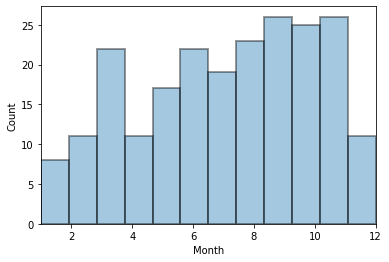

In [18]:
sns.distplot(reviews_df['release_date'].dt.month, bins = 12, hist_kws = dict(edgecolor = "k", linewidth = 2), kde = False)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xlim(1, 12)

In [19]:
reviewer = {}
for x in reviews_df['reviewed_by'].unique():
    reviewer[x] = {}
    
for index, row in reviews_df.iterrows():
    gr = row['genres'].split(',')
    for x in gr:
        if(x in reviewer[row['reviewed_by']]):
            reviewer[row['reviewed_by']][x] += 1
        else:
            reviewer[row['reviewed_by']][x] = 1
            
reviewer_df = pd.DataFrame(reviewer)
reviewer

{'Dan Stapleton': {'Compilation': 3,
  '  RPG': 3,
  'RPG': 2,
  'Action': 1,
  '  Shooter': 1,
  '  Flight': 1,
  '  Card': 1,
  '  Battle': 1},
 'Simon Cardy': {'Shooter': 2,
  '  First-Person': 2,
  'Sports': 3,
  '  Soccer': 2,
  '  Golf': 1,
  'RPG': 1,
  'Action': 1,
  '  Racing': 1,
  'Adventure': 4,
  '  Simulation': 2,
  '  Puzzle': 1,
  '  RPG': 1},
 'Leana Hafer': {'RPG': 2,
  'Strategy': 8,
  '  Real-Time': 1,
  '  4X': 2,
  'Action': 6,
  '  RPG': 1,
  '  Adventure': 3,
  '  Puzzle': 1,
  '  Saboteur': 1,
  '  MMO': 1},
 'Luke Reilly': {'Racing': 11,
  'Sports': 1,
  '  Skateboarding': 1,
  'Boxing': 1,
  'Adventure': 1,
  'Action': 2,
  '  Adventure': 1},
 'Travis Northup': {'Sports': 1,
  '  Extreme Sports': 1,
  'Action': 10,
  '  RPG': 2,
  '  Strategy': 1,
  '  Adventure': 3,
  '  Puzzle': 1,
  'RPG': 3,
  'Shooter': 1,
  '  First-Person': 1,
  'Adventure': 1,
  '  Platformer': 1,
  '  Roguelike / Rogue-Lite': 1,
  '  Shooter': 1,
  '  DLC / Expansion': 1},
 'Matt Thr

In [20]:
reviews_df['month_of_release'] = reviews_df['release_date'].dt.month_name()
reviews_df.sort_values(by = 'month_of_release', inplace = True)
score_by_month = pd.DataFrame(reviews_df.groupby('month_of_release')['score'].mean().to_dict().items(), columns = ['Month', 'Score'])
score_by_month

,Month,Score
0,April,7.454545
1,August,7.000000
2,December,6.636364
3,February,7.090909
4,January,7.750000
5,July,7.526316
6,June,7.454545
7,March,6.409091
8,May,7.352941
9,November,7.692308


C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 10.0)

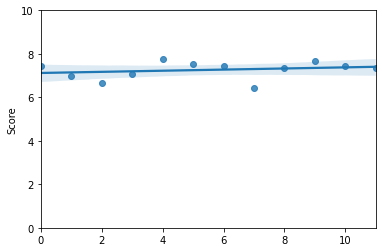

In [21]:
sns.regplot(score_by_month.index, score_by_month['Score'])
plt.ylim(0, 10)